### 1. Load the data

In [2]:
use "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Density%20plots/Density%20plot%20with%20averages%20by%20gender/data.dta", clear

(Student Test Scores)


### 2. Calculate means (by treatment and gender)

In [3]:
sum student_average if student_gender  == 0 & school_treated == 0
    local control_F = round(`r(mean)', .11)
sum student_average if student_gender  == 0 & school_treated == 1
    local treat_F = round(`r(mean)', .11)
sum student_average if student_gender  == 1 & school_treated == 0
    local control_T = round(`r(mean)', .11)
sum student_average if student_gender  == 1 & school_treated == 1
    local treat_T = round(`r(mean)', .11)



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
student_av~e |      1,010    167.9341    31.11806   82.51482   290.3984



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
student_av~e |      1,007    171.8966    32.69711   97.19298   285.9357



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
student_av~e |      1,281    159.0992    31.31213   73.84372   292.7151



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
student_av~e |      1,140    165.3279    32.92618   86.09444   282.2412



### 3. Count number of observations

In [4]:
sum student_average if student_gender == 0
    local N_F = `r(N)'
sum student_average if student_gender == 1
    local N_M = `r(N)'



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
student_av~e |      2,017    169.9124    31.96974   82.51482   290.3984



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
student_av~e |      2,421    162.0322    32.22599   73.84372   292.7151



### 4. Set locals for line colors and width

In [5]:
local purple "132 4 252" //for girls
local green "4 196 172" //for boys
local dens_width 0.6
local avg_width 0.5

### 5. Plot the graph

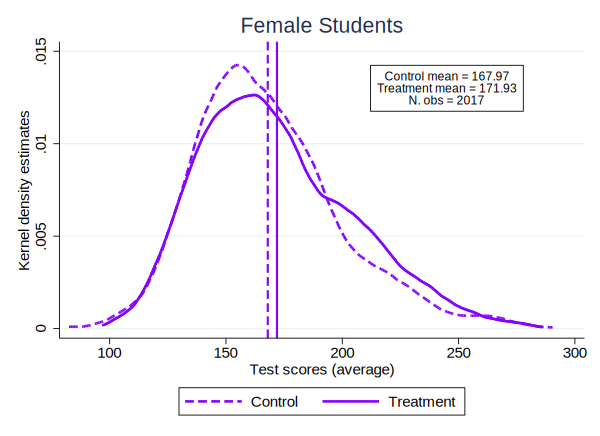

In [28]:
// Girls
gr tw (kdensity student_average if student_gender == 0 & school_treated  == 0, ///
 color("`purple'") lpattern(dash) lwidth(`dens_width')) ///
      (kdensity student_average if student_gender == 0 & school_treated  == 1, ///
 color("`purple'") lwidth(`dens_width')), xline(`control_F', lcolor(`purple') ///
 lpattern(dash) lwidth(`avg_width')) xline(`treat_F', lcolor(`purple') lwidth(`avg_width')) ///
 title("Female Students") ytitle("Kernel density estimates") xtitle("Test scores (average)") ///
 legend( lab(1 "Control") lab(2 "Treatment")) ///
 text(0.013 245 "Control mean = `control_F'" "Treatment mean = `treat_F'" "N. obs = `N_F'" , ///
 orient(horizontal)  size(small) justification(center) fcolor(white) box margin(small)) graphregion(color(white)) name(girls, replace)

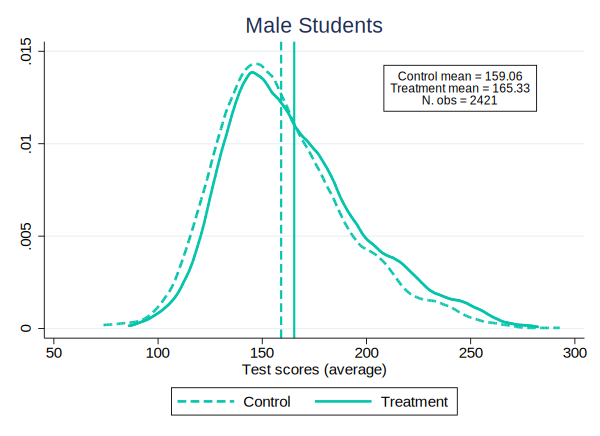

In [29]:
// Boys
gr tw (kdensity student_average if student_gender == 1 & school_treated == 0, ///
 color("`green'") lpattern(dash) lwidth(`dens_width') ) ///
      (kdensity student_average if student_gender == 1 & school_treated == 1, ///
 color("`green'") lwidth(`dens_width') ), ///
 xline(`control_T', lcolor(`green') lpattern(dash) lwidth(`avg_width')) ///
 xline(`treat_T'  , lcolor(`green') 				 lwidth(`avg_width')) ///
 title("Male Students") ytitle("") xtitle("Test scores (average)") ///
 legend(lab(1 "Control") lab(2 "Treatment")) ///
 text(0.013 245 "Control mean = `control_T'" "Treatment mean = `treat_T'" "N. obs = `N_M'", ///
 orient(horizontal)  size(small) justification(center) ///
 fcolor(white) box margin(small)) graphregion(color(white)) name(boys, replace)

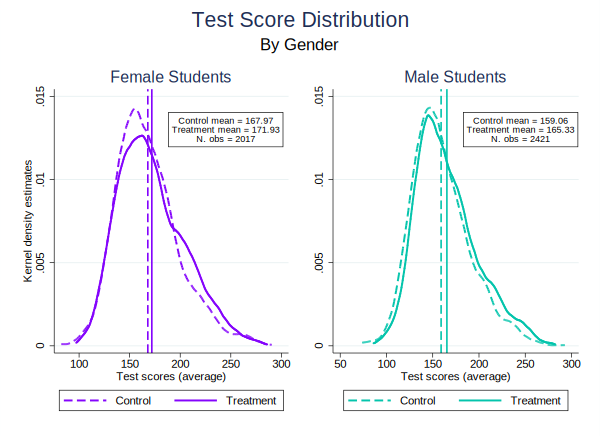

In [31]:
// Combine two graphs
gr combine girls boys, title("Test Score Distribution") subtitle("By Gender") graphregion(color(white))

### 6. Export the graph

In [42]:
qui graph export "figure.png", as(png) replace